환경

- MAC OS
- vscode
    - kernel : python 3.11.5

In [1]:
import pandas as pd

In [3]:
### train데이터와 날씨 데이터 호출
train = pd.read_csv("C:/Users/user/Desktop/머신러닝/train_data_modified.csv")
weather = pd.read_csv("C:/Users/user/Desktop/머신러닝/OBS_ASOS_TIM_20240225172450.csv", encoding = "cp949")

In [4]:
train.head()

gid        DATE  TIME  RIDE_DEMAND  ALIGHT_DEMAND
0  다마9599  2023-06-01     5            1              0
1  다마9599  2023-06-01     6            2              5
2  다마9599  2023-06-01     7            2              7
3  다마9599  2023-06-01     8            3             12
4  다마9599  2023-06-01     9            2             31

- 컬럼명세
    - GID: 격자번호
    - DATE: 일자
    - TIME: 시간(시)
    - RIDE_DEMAND: 승차 수요 **(Target Variable)**
    - ALIGHT_DEMAND: 하차 수요
    - (주의) 하차수요가 아닌 승차수요를 예측하는 모델을 제출하여야 함

In [5]:
train.shape

(539490, 5)

In [6]:
### 결측치 없음
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539490 entries, 0 to 539489
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   gid            539490 non-null  object
 1   DATE           539490 non-null  object
 2   TIME           539490 non-null  int64 
 3   RIDE_DEMAND    539490 non-null  int64 
 4   ALIGHT_DEMAND  539490 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 20.6+ MB


In [7]:
train.describe()

TIME    RIDE_DEMAND  ALIGHT_DEMAND
count  539490.000000  539490.000000  539490.000000
mean       12.714286      39.199524      39.179217
std         6.547582     106.844929     112.895851
min         0.000000       0.000000       0.000000
25%         8.000000       0.000000       0.000000
50%        13.000000       1.000000       1.000000
75%        18.000000      28.000000      26.000000
max        23.000000    2485.000000    3121.000000

In [8]:
### 시간은 05시부터 익일 01시까지 1시간 단위로 존재
train['TIME'].value_counts()

TIME
5     25690
16    25690
0     25690
23    25690
22    25690
21    25690
20    25690
19    25690
18    25690
17    25690
15    25690
6     25690
14    25690
13    25690
12    25690
11    25690
10    25690
9     25690
8     25690
7     25690
1     25690
Name: count, dtype: int64

In [9]:
import matplotlib.pyplot as plt



## 날짜에 따른 승차와 하차 추이 그래프
grouped_date = train.groupby('DATE').sum()

# 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.plot(grouped_date.index, grouped_date['RIDE_DEMAND'], label='Ride Demand', marker='o')
plt.plot(grouped_date.index, grouped_date['ALIGHT_DEMAND'], label='Alight Demand', marker='x')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('날짜에 따른 탑승/하차 수요')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

c:\Users\user\anaconda3\envs\img2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\img2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\img2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\img2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\img2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from current font.
  fig.canvas.print_figu

In [14]:
import matplotlib.pyplot as plt

# 시간에 따른 승차와 하차 추이 그래프
grouped_time = train.groupby('TIME').sum()

plt.figure(figsize=(10, 6))
plt.plot(grouped_time.index, grouped_time['RIDE_DEMAND'], label='Ride Demand', marker='o')
plt.plot(grouped_time.index, grouped_time['ALIGHT_DEMAND'], label='Alight Demand', marker='x')
plt.xlabel('TIME')
plt.ylabel('Demand')
plt.title('시간에 따른 승차/하차 수요')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

c:\Users\user\anaconda3\envs\img2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\img2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\img2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\img2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\img2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from current font.
  fig.canvas.print_figur

In [11]:
# 'DAY_OF_WEEK' 열을 기준으로 그룹화하여 합계를 계산합니다.
grouped_gid = train.groupby('gid').sum()


plt.figure(figsize=(10, 6))
plt.plot(grouped_gid.index, grouped_gid['RIDE_DEMAND'], label='Ride Demand', marker='o')
plt.plot(grouped_gid.index, grouped_gid['ALIGHT_DEMAND'], label='Alight Demand', marker='x')
plt.xlabel('구역')
plt.ylabel('수요')
plt.title('구역에 따른 승차/하차 수요')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

c:\Users\user\anaconda3\envs\img2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\img2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\img2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\img2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\img2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(

In [15]:
weather.head()

지점 지점명                일시  기온(°C)  기온 QC플래그  강수량(mm)  강수량 QC플래그  풍속(m/s)  \
0  133  대전  2023-05-01 01:00    12.5       NaN      NaN        NaN      1.2   
1  133  대전  2023-05-01 02:00    11.7       NaN      NaN        NaN      1.6   
2  133  대전  2023-05-01 03:00    11.0       NaN      NaN        NaN      1.9   
3  133  대전  2023-05-01 04:00    10.5       NaN      NaN        NaN      2.0   
4  133  대전  2023-05-01 05:00     9.7       NaN      NaN        NaN      2.1   

   풍속 QC플래그  풍향(16방위)  ...  최저운고(100m )  시정(10m)  지면상태(지면상태코드)  현상번호(국내식)  \
0       NaN     160.0  ...          8.0     1692           NaN        NaN   
1       NaN     270.0  ...          9.0     1403           NaN        NaN   
2       NaN     230.0  ...          NaN     1162           NaN        NaN   
3       NaN     230.0  ...          NaN      996           NaN       19.0   
4       NaN     200.0  ...          NaN      835           NaN       19.0   

   지면온도(°C)  지면온도 QC플래그  5cm 지중온도(°C)  10cm 지중온도(°C)  20cm 지중온도(°C)  \
0      12.1         NaN          15.4           16.7           17.4   
1      11.1         NaN          14.9           16.5           17.1   
2      10.1         NaN          14.4           16.1           16.9   
3       9.5         NaN          13.9           15.8           16.6   
4       8.8         NaN          13.4           15.5           16.4   

   30cm 지중온도(°C)  
0           17.6  
1           17.4  
2           17.3  
3           17.1  
4           16.9  

[5 rows x 38 columns]

In [16]:
# 'DATE' 열과 'TIME' 열을 결합하여 'datetime' 열을 생성
# 'TIME' 열의 값을 문자열로 변환하고, 시간 부분을 두 자리로 맞추고, 분 부분을 ':00'으로 설정
train['datetime'] = train['DATE'] + ' ' + train['TIME'].astype(str).str.zfill(2) + ':00'

In [17]:
weather = weather.rename(columns={'지점': 'num', '지점명': 'name', '일시': 'datetime', '기온(°C)': 'temp', '강수량(mm)':'prec'})

In [18]:
weather = weather.loc[: , ['num', 'name','datetime', 'temp','prec']]

In [19]:
weather.head()

num name          datetime  temp  prec
0  133   대전  2023-05-01 01:00  12.5   NaN
1  133   대전  2023-05-01 02:00  11.7   NaN
2  133   대전  2023-05-01 03:00  11.0   NaN
3  133   대전  2023-05-01 04:00  10.5   NaN
4  133   대전  2023-05-01 05:00   9.7   NaN

In [20]:
# 날씨를 변수로 사용하기 위해서 데이터 프레임 결합
train = pd.merge(train, weather, on='datetime', how = 'left')

In [21]:
train.head()

gid        DATE  TIME  RIDE_DEMAND  ALIGHT_DEMAND          datetime  \
0  다마9599  2023-06-01     5            1              0  2023-06-01 05:00   
1  다마9599  2023-06-01     6            2              5  2023-06-01 06:00   
2  다마9599  2023-06-01     7            2              7  2023-06-01 07:00   
3  다마9599  2023-06-01     8            3             12  2023-06-01 08:00   
4  다마9599  2023-06-01     9            2             31  2023-06-01 09:00   

   num name  temp  prec  
0  133   대전  18.0   NaN  
1  133   대전  18.1   NaN  
2  133   대전  18.9   NaN  
3  133   대전  20.6   NaN  
4  133   대전  22.3   NaN

In [22]:
# 강수량 nan은 바가 오지 않은것 이므로 0으로 채움
train['prec'].fillna(0, inplace=True)

In [23]:
# 비가 온날과 안온날을 구분해주는 함수 생성
def rainy(x):
    if x == 0:
        return 0
    else:
        return 1

In [24]:
train['rainy_day'] = train['prec'].apply(rainy)

In [25]:
train.head()

gid        DATE  TIME  RIDE_DEMAND  ALIGHT_DEMAND          datetime  \
0  다마9599  2023-06-01     5            1              0  2023-06-01 05:00   
1  다마9599  2023-06-01     6            2              5  2023-06-01 06:00   
2  다마9599  2023-06-01     7            2              7  2023-06-01 07:00   
3  다마9599  2023-06-01     8            3             12  2023-06-01 08:00   
4  다마9599  2023-06-01     9            2             31  2023-06-01 09:00   

   num name  temp  prec  rainy_day  
0  133   대전  18.0   0.0          0  
1  133   대전  18.1   0.0          0  
2  133   대전  18.9   0.0          0  
3  133   대전  20.6   0.0          0  
4  133   대전  22.3   0.0          0

In [26]:
# 'DATE' 열의 값을 날짜 형식으로 변환하여 'base_date' 열을 생성합니다.
# 변환할 때 사용되는 날짜 형식은 "%Y-%m-%d"이며, 이는 연도-월-일 형식을 나타냅니다.
train["base_date"] = pd.to_datetime(train["DATE"], format="%Y-%m-%d")

In [27]:
train.head()

gid        DATE  TIME  RIDE_DEMAND  ALIGHT_DEMAND          datetime  \
0  다마9599  2023-06-01     5            1              0  2023-06-01 05:00   
1  다마9599  2023-06-01     6            2              5  2023-06-01 06:00   
2  다마9599  2023-06-01     7            2              7  2023-06-01 07:00   
3  다마9599  2023-06-01     8            3             12  2023-06-01 08:00   
4  다마9599  2023-06-01     9            2             31  2023-06-01 09:00   

   num name  temp  prec  rainy_day  base_date  
0  133   대전  18.0   0.0          0 2023-06-01  
1  133   대전  18.1   0.0          0 2023-06-01  
2  133   대전  18.9   0.0          0 2023-06-01  
3  133   대전  20.6   0.0          0 2023-06-01  
4  133   대전  22.3   0.0          0 2023-06-01

In [28]:
# 년 / 월 / 일로 변경 및 요일 변수
train['YEAR'] = train['base_date'].dt.year
train['MONTH'] = train['base_date'].dt.month
train['DAY'] = train['base_date'].dt.day
train['weekday'] = train['base_date'].dt.weekday

In [29]:
# 주말 여부
def weekend(x):
    if x ==5:
        return 1
    elif x==6:
        return 1
    else:
        return 0

In [30]:
train['weekend'] = train['weekday'].apply(weekend)

In [31]:
train.head()

gid        DATE  TIME  RIDE_DEMAND  ALIGHT_DEMAND          datetime  \
0  다마9599  2023-06-01     5            1              0  2023-06-01 05:00   
1  다마9599  2023-06-01     6            2              5  2023-06-01 06:00   
2  다마9599  2023-06-01     7            2              7  2023-06-01 07:00   
3  다마9599  2023-06-01     8            3             12  2023-06-01 08:00   
4  다마9599  2023-06-01     9            2             31  2023-06-01 09:00   

   num name  temp  prec  rainy_day  base_date  YEAR  MONTH  DAY  weekday  \
0  133   대전  18.0   0.0          0 2023-06-01  2023      6    1        3   
1  133   대전  18.1   0.0          0 2023-06-01  2023      6    1        3   
2  133   대전  18.9   0.0          0 2023-06-01  2023      6    1        3   
3  133   대전  20.6   0.0          0 2023-06-01  2023      6    1        3   
4  133   대전  22.3   0.0          0 2023-06-01  2023      6    1        3   

   weekend  
0        0  
1        0  
2        0  
3        0  
4        0

In [32]:
# 공휴일 여부
def holiday(x):
    if x in ['2023-06-06','2023-08-15']:
        return 1
    else:
        return 0

In [33]:
train['holiday'] = train['DATE'].apply(holiday)

In [34]:
train.head()

gid        DATE  TIME  RIDE_DEMAND  ALIGHT_DEMAND          datetime  \
0  다마9599  2023-06-01     5            1              0  2023-06-01 05:00   
1  다마9599  2023-06-01     6            2              5  2023-06-01 06:00   
2  다마9599  2023-06-01     7            2              7  2023-06-01 07:00   
3  다마9599  2023-06-01     8            3             12  2023-06-01 08:00   
4  다마9599  2023-06-01     9            2             31  2023-06-01 09:00   

   num name  temp  prec  rainy_day  base_date  YEAR  MONTH  DAY  weekday  \
0  133   대전  18.0   0.0          0 2023-06-01  2023      6    1        3   
1  133   대전  18.1   0.0          0 2023-06-01  2023      6    1        3   
2  133   대전  18.9   0.0          0 2023-06-01  2023      6    1        3   
3  133   대전  20.6   0.0          0 2023-06-01  2023      6    1        3   
4  133   대전  22.3   0.0          0 2023-06-01  2023      6    1        3   

   weekend  holiday  
0        0        0  
1        0        0  
2        0        0  
3        0        0  
4        0        0

In [35]:
# 관계있는 요일 그룹화
def weekdays(data):
    data['weekday_group'] = None
    data.loc[data['weekday'].isin([0,1, 2, 3,4]), 'weekday_group'] = '평일'
    data.loc[data['weekday'].isin([5, 6]), 'weekday_group'] = ' 주말'

weekdays(train)
train.head()

gid        DATE  TIME  RIDE_DEMAND  ALIGHT_DEMAND          datetime  \
0  다마9599  2023-06-01     5            1              0  2023-06-01 05:00   
1  다마9599  2023-06-01     6            2              5  2023-06-01 06:00   
2  다마9599  2023-06-01     7            2              7  2023-06-01 07:00   
3  다마9599  2023-06-01     8            3             12  2023-06-01 08:00   
4  다마9599  2023-06-01     9            2             31  2023-06-01 09:00   

   num name  temp  prec  rainy_day  base_date  YEAR  MONTH  DAY  weekday  \
0  133   대전  18.0   0.0          0 2023-06-01  2023      6    1        3   
1  133   대전  18.1   0.0          0 2023-06-01  2023      6    1        3   
2  133   대전  18.9   0.0          0 2023-06-01  2023      6    1        3   
3  133   대전  20.6   0.0          0 2023-06-01  2023      6    1        3   
4  133   대전  22.3   0.0          0 2023-06-01  2023      6    1        3   

   weekend  holiday weekday_group  
0        0        0            평일  
1        0        0            평일  
2        0        0            평일  
3        0        0            평일  
4        0        0            평일

In [37]:
### 버스 정류장 데이터 호출
bus_stop = pd.read_csv("C:/Users/user/Desktop/머신러닝/대전광역시_버스정류장 현황_20221215 (1).csv", encoding='cp949')

In [38]:
bus_stop.head()

지형지물부호        관리번호      행정읍면동      도엽번호  도로구간번호        공사번호 정류장종류      정류장명  \
0    정류장  2209000001  대전광역시 동구   36710089   14220  STT0001000  버스공용   면허시험장입구   
1    정류장  2209000002  대전광역시 동구   36710079   20093  STT0002000  시내버스  은어송마을5단지   
2    정류장  2209000003  대전광역시 동구   36710079   20093  STT0003000  시내버스  은어송마을5단지   
3    정류장  2209000004  대전광역시 동구   36710089   18474  STT0004000  버스공용  삼익아파트고산사   
4    정류장  2209000006  대전광역시 중구   36710086   19961  STT0006000  시외버스   침산교(점말)   

      정류장유형  대장초기화여부         위도          경도  
0      표지설치        1  36.290530  127.463263  
1  유개형(도시형)        1  36.308424  127.458762  
2  유개형(도시형)        1  36.308601  127.459336  
3  유개형(도시형)        1  36.296939  127.460022  
4  유개형(도시형)        1  36.276302  127.397281

In [39]:
import geopandas as gpd

### 대전광역시 1KM격자 데이터 생성
grid = gpd.read_file("C:/Users/user/Desktop/머신러닝/국토통계_인구정보-총 인구 수(전체)-(격자) 1KM_대전광역시_202304 (1)/nlsp_020001001.shp", encoding = 'utf-8')

In [40]:
grid.head()

gid       lbl      val  \
0  다바8516  16173.00  16173.0   
1  라바0120     31.00     31.0   
2  다바9614  14729.00  14729.0   
3  다바8728       N/A      0.0   
4  다바9716     79.00     79.0   

                                            geometry  
0  POLYGON ((985000.000 1816000.000, 985000.000 1...  
1  POLYGON ((1001000.000 1820000.000, 1001000.000...  
2  POLYGON ((996000.000 1814000.000, 996000.000 1...  
3  POLYGON ((987000.000 1828000.000, 987000.000 1...  
4  POLYGON ((997000.000 1816000.000, 997000.000 1...

In [41]:
# shapely.geometry 라이브러리에서 Point 클래스를 가져옴
from shapely.geometry import Point

# '경도'와 '위도' 열을 사용하여 '버스정류장좌표' 열을 생성
# 각 행에 대해 Point 객체를 생성하고, '버스정류장좌표' 열에 할당
bus_stop['버스정류장좌표'] = bus_stop.apply(lambda row: Point(row['경도'], row['위도']), axis=1)

# GeoDataFrame을 생성하여 '버스정류장좌표' 열을 지오메트리로 사용
bus_stop_gps = gpd.GeoDataFrame(bus_stop, geometry='버스정류장좌표')

# 좌표 시스템을 EPSG 코드 4326으로 설정
bus_stop_gps.set_crs(epsg=4326, inplace=True)

# 좌표 시스템을 EPSG 코드 5179로 변환
gdf_bus_pickup = bus_stop_gps.to_crs(epsg=5179)

# 'gdf_bus_pickup'과 'grid' 간의 지오메트리 연산을 수행하고, 'left' 조인 방식으로 연결
# 'within' 연산을 사용하여 'gdf_bus_pickup'의 점이 'grid' 다각형 내에 있는 경우 연결
bus_stop_join = gpd.sjoin(gdf_bus_pickup, grid, how='left', op='within')

c:\Users\user\anaconda3\envs\img2\lib\site-packages\IPython\core\interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\user\AppData\Local\Temp\ipykernel_19500\2897787808.py:19: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:5179
Right CRS: PROJCS["Korea 2000 / Unified CS",GEOGCS["Korea 200 ...

  bus_stop_join = gpd.sjoin(gdf_bus_pickup, grid, how='left', op='within')


In [42]:
bus_stop_join.head()

지형지물부호        관리번호      행정읍면동      도엽번호  도로구간번호        공사번호 정류장종류      정류장명  \
0    정류장  2209000001  대전광역시 동구   36710089   14220  STT0001000  버스공용   면허시험장입구   
1    정류장  2209000002  대전광역시 동구   36710079   20093  STT0002000  시내버스  은어송마을5단지   
2    정류장  2209000003  대전광역시 동구   36710079   20093  STT0003000  시내버스  은어송마을5단지   
3    정류장  2209000004  대전광역시 동구   36710089   18474  STT0004000  버스공용  삼익아파트고산사   
4    정류장  2209000006  대전광역시 중구   36710086   19961  STT0006000  시외버스   침산교(점말)   

      정류장유형  대장초기화여부         위도          경도                         버스정류장좌표  \
0      표지설치        1  36.290530  127.463263  POINT (996701.196 1810358.823)   
1  유개형(도시형)        1  36.308424  127.458762  POINT (996297.879 1812343.828)   
2  유개형(도시형)        1  36.308601  127.459336  POINT (996349.400 1812363.418)   
3  유개형(도시형)        1  36.296939  127.460022  POINT (996410.443 1811069.896)   
4  유개형(도시형)        1  36.276302  127.397281  POINT (990774.590 1808784.959)   

   index_right     gid      lbl     val  
0           66  다바9610   961.00   961.0  
1           50  다바9612  7385.00  7385.0  
2           50  다바9612  7385.00  7385.0  
3          305  다바9611  9738.00  9738.0  
4          425  다바9008   120.00   120.0

In [43]:
gid_counts = bus_stop_join['gid'].value_counts()

In [44]:
gid_counts_df = pd.DataFrame(gid_counts).reset_index()
gid_counts_df.columns = ['gid', 'count']


In [45]:
gid_counts_df.head()

gid  count
0  다바9314     30
1  다바8917     25
2  다바8817     23
3  다바9017     21
4  다바8511     20

In [46]:
### 버스 정류장 갯수를 변수로 사용하기 위해 데이터프레임 결합
train = pd.merge(train, gid_counts_df, how= 'left', on = 'gid')

In [47]:
train.head()


gid        DATE  TIME  RIDE_DEMAND  ALIGHT_DEMAND          datetime  \
0  다마9599  2023-06-01     5            1              0  2023-06-01 05:00   
1  다마9599  2023-06-01     6            2              5  2023-06-01 06:00   
2  다마9599  2023-06-01     7            2              7  2023-06-01 07:00   
3  다마9599  2023-06-01     8            3             12  2023-06-01 08:00   
4  다마9599  2023-06-01     9            2             31  2023-06-01 09:00   

   num name  temp  prec  rainy_day  base_date  YEAR  MONTH  DAY  weekday  \
0  133   대전  18.0   0.0          0 2023-06-01  2023      6    1        3   
1  133   대전  18.1   0.0          0 2023-06-01  2023      6    1        3   
2  133   대전  18.9   0.0          0 2023-06-01  2023      6    1        3   
3  133   대전  20.6   0.0          0 2023-06-01  2023      6    1        3   
4  133   대전  22.3   0.0          0 2023-06-01  2023      6    1        3   

   weekend  holiday weekday_group  count  
0        0        0            평일    NaN  
1        0        0            평일    NaN  
2        0        0            평일    NaN  
3        0        0            평일    NaN  
4        0        0            평일    NaN

In [48]:
### 버스 정류장이 없는 곳은 0입력
train['count'].fillna(0, inplace=True)

In [49]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코딩
str_col = ['gid', 'weekday_group']  # 라벨 인코딩을 적용할 컬럼 이름 리스트를 정의합니다.

for i in str_col:  # 리스트에 있는 각 컬럼 이름에 대해 반복문을 실행합니다.
    le = LabelEncoder()  # LabelEncoder 클래스의 인스턴스를 생성합니다.
    le = le.fit(train[i])  # train 데이터프레임의 지정된 컬럼에 LabelEncoder를 적용합니다.
    train[i] = le.transform(train[i])  # 적용된 LabelEncoder를 사용하여 컬럼의 값을 변환하고 데이터프레임을 업데이트합니다.


In [50]:
train.head()

gid        DATE  TIME  RIDE_DEMAND  ALIGHT_DEMAND          datetime  num  \
0    0  2023-06-01     5            1              0  2023-06-01 05:00  133   
1    0  2023-06-01     6            2              5  2023-06-01 06:00  133   
2    0  2023-06-01     7            2              7  2023-06-01 07:00  133   
3    0  2023-06-01     8            3             12  2023-06-01 08:00  133   
4    0  2023-06-01     9            2             31  2023-06-01 09:00  133   

  name  temp  prec  rainy_day  base_date  YEAR  MONTH  DAY  weekday  weekend  \
0   대전  18.0   0.0          0 2023-06-01  2023      6    1        3        0   
1   대전  18.1   0.0          0 2023-06-01  2023      6    1        3        0   
2   대전  18.9   0.0          0 2023-06-01  2023      6    1        3        0   
3   대전  20.6   0.0          0 2023-06-01  2023      6    1        3        0   
4   대전  22.3   0.0          0 2023-06-01  2023      6    1        3        0   

   holiday  weekday_group  count  
0        0              1    0.0  
1        0              1    0.0  
2        0              1    0.0  
3        0              1    0.0  
4        0              1    0.0

In [51]:
grid_1KM = "C:/Users/user/Desktop/머신러닝/국토통계_인구정보-총 인구 수(전체)-(격자) 1KM_대전광역시_202304 (1)/nlsp_020001001.shp"
data = gpd.read_file(grid_1KM, encoding='utf-8')

In [52]:
data.head()

gid       lbl      val  \
0  다바8516  16173.00  16173.0   
1  라바0120     31.00     31.0   
2  다바9614  14729.00  14729.0   
3  다바8728       N/A      0.0   
4  다바9716     79.00     79.0   

                                            geometry  
0  POLYGON ((985000.000 1816000.000, 985000.000 1...  
1  POLYGON ((1001000.000 1820000.000, 1001000.000...  
2  POLYGON ((996000.000 1814000.000, 996000.000 1...  
3  POLYGON ((987000.000 1828000.000, 987000.000 1...  
4  POLYGON ((997000.000 1816000.000, 997000.000 1...

In [53]:
str_col = ['gid']
for i in str_col :
    le = LabelEncoder()
    le = le.fit(data[i])
    data[i] = le.transform(data[i])

In [54]:
data.head()

gid       lbl      val                                           geometry
0  168  16173.00  16173.0  POLYGON ((985000.000 1816000.000, 985000.000 1...
1  610     31.00     31.0  POLYGON ((1001000.000 1820000.000, 1001000.000...
2  490  14729.00  14729.0  POLYGON ((996000.000 1814000.000, 996000.000 1...
3  236       N/A      0.0  POLYGON ((987000.000 1828000.000, 987000.000 1...
4  522     79.00     79.0  POLYGON ((997000.000 1816000.000, 997000.000 1...

In [55]:
train.drop(['base_date', 'datetime', 'name', 'num','YEAR','DATE','temp'], axis=1, inplace=True)


In [56]:
train.head()

gid  TIME  RIDE_DEMAND  ALIGHT_DEMAND  prec  rainy_day  MONTH  DAY  \
0    0     5            1              0   0.0          0      6    1   
1    0     6            2              5   0.0          0      6    1   
2    0     7            2              7   0.0          0      6    1   
3    0     8            3             12   0.0          0      6    1   
4    0     9            2             31   0.0          0      6    1   

   weekday  weekend  holiday  weekday_group  count  
0        3        0        0              1    0.0  
1        3        0        0              1    0.0  
2        3        0        0              1    0.0  
3        3        0        0              1    0.0  
4        3        0        0              1    0.0

In [57]:
lard = gpd.read_file("C:/Users/user/Desktop/머신러닝/국토교통부 - 행정구역시군구 경계/LARD_ADM_SECT_SGG_30.shp")

In [58]:
import numpy as np

# Haversine 공식을 이용하여 위도와 경도에 기반한 거리를 계산하는 함수 정의
def haversine_array(lat1, lng1, lat2, lng2):
    # 위도 및 경도를 라디안으로 변환
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # 지구 반지름 (킬로미터 단위)

    # Haversine 공식 적용
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

# 총 하차 수 상위 10개 gid 추출하여 정렬
base_gid = train.groupby(['gid'])['ALIGHT_DEMAND'].agg([('ALIGHT_SUM', 'sum')]).sort_values(by='ALIGHT_SUM', ascending=False).head(10).index

# 데이터의 중심점(geometry_centroid)에 대한 geometry 속성 계산
data['geometry_centroid'] = data['geometry'].centroid

# 각 중심점이 어떤 구(polygon)에 속하는지 찾기
for idx, row in data.iterrows():
    point = row['geometry_centroid']

    for poly_idx, polygon in lard.iterrows():
        if (polygon['geometry']).contains(point):
            data.loc[idx, 'polygon_idx'] = poly_idx
            break

# 데이터에 위도(Latitude) 및 경도(Longitude) 열 추가
data['Latitude'] = data['geometry_centroid'].apply(lambda point: point.y)
data['Longitude'] = data['geometry_centroid'].apply(lambda point: point.x)

# 각 상위 10개 gid와의 거리 계산 및 열 추가
for i in base_gid:
    base_lat, base_lng = data[data['gid'] == i]['geometry_centroid'].y, data[data['gid'] == i]['geometry_centroid'].x
    col_name = f'distance_{i}'
    data[col_name] = data.apply(lambda row: haversine_array(base_lat, base_lng, row['geometry_centroid'].y, row['geometry_centroid'].x), axis=1)

# 데이터프레임에서 불필요한 열 제거
gid_dis = data.drop(['lbl', 'val', 'geometry', 'geometry_centroid'], axis=1)

# 기존 train 및 test 데이터프레임에 거리 정보 추가
train = pd.merge(train, gid_dis, on='gid', how='left')

# 결측값을 경계 외(5)로 채우기
train['polygon_idx'].fillna(5, inplace=True)


In [59]:
train.head()

gid  TIME  RIDE_DEMAND  ALIGHT_DEMAND  prec  rainy_day  MONTH  DAY  \
0    0     5            1              0   0.0          0      6    1   
1    0     6            2              5   0.0          0      6    1   
2    0     7            2              7   0.0          0      6    1   
3    0     8            3             12   0.0          0      6    1   
4    0     9            2             31   0.0          0      6    1   

   weekday  weekend  ...  distance_159  distance_240  distance_262  \
0        3        0  ...   4169.195342  16016.835554  13782.762233   
1        3        0  ...   4169.195342  16016.835554  13782.762233   
2        3        0  ...   4169.195342  16016.835554  13782.762233   
3        3        0  ...   4169.195342  16016.835554  13782.762233   
4        3        0  ...   4169.195342  16016.835554  13782.762233   

    distance_89  distance_264  distance_241  distance_181  distance_202  \
0  15619.442727   4242.486976   2189.773241  18907.379544   6891.381116   
1  15619.442727   4242.486976   2189.773241  18907.379544   6891.381116   
2  15619.442727   4242.486976   2189.773241  18907.379544   6891.381116   
3  15619.442727   4242.486976   2189.773241  18907.379544   6891.381116   
4  15619.442727   4242.486976   2189.773241  18907.379544   6891.381116   

   distance_109  distance_158  
0   14293.97875  11385.544125  
1   14293.97875  11385.544125  
2   14293.97875  11385.544125  
3   14293.97875  11385.544125  
4   14293.97875  11385.544125  

[5 rows x 26 columns]

In [60]:
train.columns

Index(['gid', 'TIME', 'RIDE_DEMAND', 'ALIGHT_DEMAND', 'prec', 'rainy_day',
       'MONTH', 'DAY', 'weekday', 'weekend', 'holiday', 'weekday_group',
       'count', 'polygon_idx', 'Latitude', 'Longitude', 'distance_159',
       'distance_240', 'distance_262', 'distance_89', 'distance_264',
       'distance_241', 'distance_181', 'distance_202', 'distance_109',
       'distance_158'],
      dtype='object')

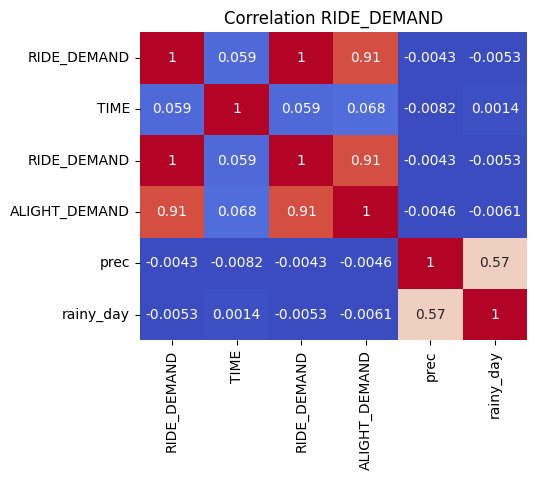

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수 계산
correlation = train[['RIDE_DEMAND', 'TIME', 'RIDE_DEMAND', 'ALIGHT_DEMAND', 'prec', 'rainy_day']].corr()

# 상관관계 그래프 그리기
plt.figure(figsize=(5, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation RIDE_DEMAND')
plt.show()


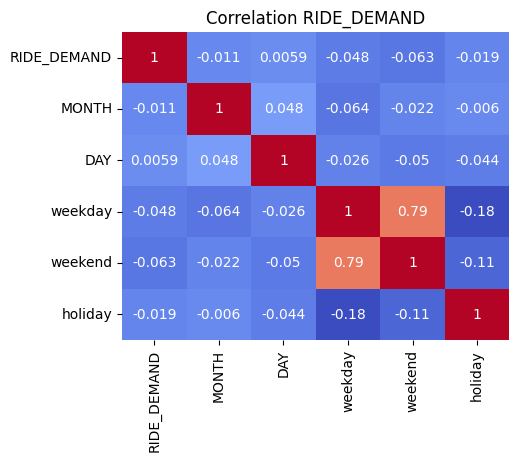

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수 계산
correlation = train[['RIDE_DEMAND', 'MONTH', 'DAY', 'weekday', 'weekend', 'holiday']].corr()

# 상관관계 그래프 그리기
plt.figure(figsize=(5, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation RIDE_DEMAND')
plt.show()


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수 계산
correlation = train[['RIDE_DEMAND','weekday_group', 'count', 'polygon_idx', 'Latitude', 'Longitude']].corr()

# 상관관계 그래프 그리기
plt.figure(figsize=(5, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation RIDE_DEMAND')
plt.show()


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수 계산
correlation = train[['RIDE_DEMAND','distance_159', 'distance_240', 'distance_262', 'distance_89',
       'distance_264', 'distance_241', 'distance_181', 'distance_202',
       'distance_109', 'distance_158']].corr()

# 상관관계 그래프 그리기
plt.figure(figsize=(5, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation RIDE_DEMAND')
plt.show()


In [65]:
# 상관관계 계산 및 그래프 그리기
correlation = train.corr()['RIDE_DEMAND']

# 상관관계 그래프 그리기
plt.figure(figsize=(15, 10))
sns.barplot(x=correlation.values, y=correlation.index)
plt.title('Correlation with RIDE_DEMAND')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Columns')
plt.show()



In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# 특성과 타겟 변수 선택
features = train.drop(['RIDE_DEMAND'], axis=1)  # 타겟 변수와 날짜 열을 제외합니다.
target = train['RIDE_DEMAND']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# RandomForestRegressor 모델 생성 및 하이퍼파라미터 설정
random_forest_model = RandomForestRegressor(n_estimators=1200, max_depth=30, min_samples_split=2, min_samples_leaf=1, random_state=42)

# 모델 훈련
random_forest_model.fit(X_train, y_train)

# 훈련 세트에서 예측 수행
train_predictions = random_forest_model.predict(X_train)

# 모델 평가 (훈련 세트)
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

print(f'MAE (Training Set): {train_mae}')
print(f'MSE (Training Set): {train_mse}')
print(f'R2 Score (Training Set): {train_r2}')

# 테스트 세트에서 예측 수행
test_predictions = random_forest_model.predict(X_test)

# 모델 평가 (테스트 세트)
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'MAE (Test Set): {mae}')
print(f'MSE (Test Set): {mse}')
print(f'R2 Score (Test Set): {r2}')

MAE (Training Set): 1.7275697785038635
MSE (Training Set): 22.352345064549272
R2 Score (Training Set): 0.9980314431604629
MAE (Test Set): 4.560172329029713
MSE (Test Set): 172.20507435466283
R2 Score (Test Set): 0.9852314239081967


In [67]:
import joblib

# 모델을 저장
joblib.dump(random_forest_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [1]:
import joblib

# 모델을 로드
loaded_model = joblib.load('random_forest_model.pkl')


---

실제값 예측

In [ ]:
import pandas as pd

In [ ]:
test = pd.read_csv("C:/Users/user/Desktop/머신러닝/test_data_modified.csv")

In [ ]:
test.head()

gid        DATE  TIME  ALIGHT_DEMAND
0  다마9599  2023-06-24     5              0
1  다마9599  2023-06-24     6              1
2  다마9599  2023-06-24     7              0
3  다마9599  2023-06-24     8              1
4  다마9599  2023-06-24     9              5

In [ ]:
### Target열 생성
test['RIDE_DEMAND'] = pd.NA

In [ ]:
test.head()

gid        DATE  TIME  ALIGHT_DEMAND RIDE_DEMAND
0  다마9599  2023-06-24     5              0        <NA>
1  다마9599  2023-06-24     6              1        <NA>
2  다마9599  2023-06-24     7              0        <NA>
3  다마9599  2023-06-24     8              1        <NA>
4  다마9599  2023-06-24     9              5        <NA>

In [ ]:
weather = pd.read_csv("C:/Users/user/Desktop/머신러닝/OBS_ASOS_TIM_20240225172450.csv", encoding = "cp949")

In [ ]:
weather.head()

지점 지점명                일시  기온(°C)  기온 QC플래그  강수량(mm)  강수량 QC플래그  풍속(m/s)  \
0  133  대전  2023-05-31 00:00    19.8       NaN      NaN        NaN      3.1   
1  133  대전  2023-05-31 01:00    19.2       NaN      NaN        NaN      2.0   
2  133  대전  2023-05-31 02:00    18.3       NaN      NaN        NaN      3.1   
3  133  대전  2023-05-31 03:00    17.3       NaN      NaN        NaN      2.7   
4  133  대전  2023-05-31 04:00    16.9       NaN      NaN        NaN      2.8   

   풍속 QC플래그  풍향(16방위)  ...  최저운고(100m )  시정(10m)  지면상태(지면상태코드)  현상번호(국내식)  \
0       NaN       140  ...          NaN     5000           NaN        NaN   
1       NaN        90  ...         57.0     5000           NaN        NaN   
2       NaN       140  ...         57.0     5000           NaN        NaN   
3       NaN       110  ...          NaN     5000           NaN        NaN   
4       NaN       140  ...          NaN     5000           NaN        NaN   

   지면온도(°C)  지면온도 QC플래그  5cm 지중온도(°C)  10cm 지중온도(°C)  20cm 지중온도(°C)  \
0      19.0         NaN          22.4           23.1           23.7   
1      18.7         NaN          21.9           22.8           23.5   
2      18.1         NaN          21.4           22.5           23.2   
3      17.1         NaN          20.8           22.1           23.0   
4      16.3         NaN          20.3           21.8           22.8   

   30cm 지중온도(°C)  
0           22.7  
1           22.6  
2           22.5  
3           22.4  
4           22.3  

[5 rows x 38 columns]

In [ ]:
# 'DATE' 열과 'TIME' 열을 결합하여 'datetime' 열을 생성
# 'TIME' 열의 값을 문자열로 변환하고, 시간 부분을 두 자리로 맞추고, 분 부분을 ':00'으로 설정
test['datetime'] = test['DATE'] + ' ' + test['TIME'].astype(str).str.zfill(2) + ':00'

In [ ]:
weather = weather.rename(columns={'지점': 'num', '지점명': 'name', '일시': 'datetime', '기온(°C)': 'temp', '강수량(mm)':'prec'})

In [ ]:
weather = weather.loc[: , ['num', 'name','datetime', 'temp','prec']]

In [ ]:
weather.head()

num name          datetime  temp  prec
0  133   대전  2023-05-31 00:00  19.8   NaN
1  133   대전  2023-05-31 01:00  19.2   NaN
2  133   대전  2023-05-31 02:00  18.3   NaN
3  133   대전  2023-05-31 03:00  17.3   NaN
4  133   대전  2023-05-31 04:00  16.9   NaN

In [ ]:
# 날씨를 변수로 사용하기 위해서 데이터 프레임 결합
test = pd.merge(test, weather, on='datetime', how = 'left')

In [ ]:
test.head()

gid        DATE  TIME  ALIGHT_DEMAND RIDE_DEMAND          datetime  num  \
0  다마9599  2023-06-24     5              0        <NA>  2023-06-24 05:00  133   
1  다마9599  2023-06-24     6              1        <NA>  2023-06-24 06:00  133   
2  다마9599  2023-06-24     7              0        <NA>  2023-06-24 07:00  133   
3  다마9599  2023-06-24     8              1        <NA>  2023-06-24 08:00  133   
4  다마9599  2023-06-24     9              5        <NA>  2023-06-24 09:00  133   

  name  temp  prec  
0   대전  22.4   NaN  
1   대전  22.4   NaN  
2   대전  23.3   NaN  
3   대전  25.2   NaN  
4   대전  26.6   NaN

In [ ]:
# 강수량 nan은 바가 오지 않은것 이므로 0으로 채움
test['prec'].fillna(0, inplace=True)

In [ ]:
# 비 오늘 날
def rainy(x):
    if x == 0:
        return 0
    else:
        return 1

In [ ]:
test['rainy_day'] = test['prec'].apply(rainy)

In [ ]:
test.head()

gid        DATE  TIME  ALIGHT_DEMAND RIDE_DEMAND          datetime  num  \
0  다마9599  2023-06-24     5              0        <NA>  2023-06-24 05:00  133   
1  다마9599  2023-06-24     6              1        <NA>  2023-06-24 06:00  133   
2  다마9599  2023-06-24     7              0        <NA>  2023-06-24 07:00  133   
3  다마9599  2023-06-24     8              1        <NA>  2023-06-24 08:00  133   
4  다마9599  2023-06-24     9              5        <NA>  2023-06-24 09:00  133   

  name  temp  prec  rainy_day  
0   대전  22.4   0.0          0  
1   대전  22.4   0.0          0  
2   대전  23.3   0.0          0  
3   대전  25.2   0.0          0  
4   대전  26.6   0.0          0

In [ ]:
# 'DATE' 열의 값을 날짜 형식으로 변환하여 'base_date' 열을 생성합니다.
# 변환할 때 사용되는 날짜 형식은 "%Y-%m-%d"이며, 이는 연도-월-일 형식을 나타냅니다.
test["base_date"] = pd.to_datetime(test["DATE"], format="%Y-%m-%d")

In [ ]:
test.head()

gid        DATE  TIME  ALIGHT_DEMAND RIDE_DEMAND          datetime  num  \
0  다마9599  2023-06-24     5              0        <NA>  2023-06-24 05:00  133   
1  다마9599  2023-06-24     6              1        <NA>  2023-06-24 06:00  133   
2  다마9599  2023-06-24     7              0        <NA>  2023-06-24 07:00  133   
3  다마9599  2023-06-24     8              1        <NA>  2023-06-24 08:00  133   
4  다마9599  2023-06-24     9              5        <NA>  2023-06-24 09:00  133   

  name  temp  prec  rainy_day  base_date  
0   대전  22.4   0.0          0 2023-06-24  
1   대전  22.4   0.0          0 2023-06-24  
2   대전  23.3   0.0          0 2023-06-24  
3   대전  25.2   0.0          0 2023-06-24  
4   대전  26.6   0.0          0 2023-06-24

In [ ]:
# 년 / 월 / 일로 변경 및 요일 변수
test['YEAR'] = test['base_date'].dt.year
test['MONTH'] = test['base_date'].dt.month
test['DAY'] = test['base_date'].dt.day
test['weekday'] = test['base_date'].dt.weekday

In [ ]:
# 주말 여부
def weekend(x):
    if x ==5:
        return 1
    elif x==6:
        return 1
    else:
        return 0

In [ ]:
test['weekend'] = test['weekday'].apply(weekend)

In [ ]:
# 공휴일 여부
def holiday(x):
    if x in ['2023-06-06','2023-08-15']:
        return 1
    else:
        return 0

In [ ]:
test['holiday'] = test['DATE'].apply(holiday)


In [ ]:
test.head()

gid        DATE  TIME  ALIGHT_DEMAND RIDE_DEMAND          datetime  num  \
0  다마9599  2023-06-24     5              0        <NA>  2023-06-24 05:00  133   
1  다마9599  2023-06-24     6              1        <NA>  2023-06-24 06:00  133   
2  다마9599  2023-06-24     7              0        <NA>  2023-06-24 07:00  133   
3  다마9599  2023-06-24     8              1        <NA>  2023-06-24 08:00  133   
4  다마9599  2023-06-24     9              5        <NA>  2023-06-24 09:00  133   

  name  temp  prec  rainy_day  base_date  YEAR  MONTH  DAY  weekday  weekend  \
0   대전  22.4   0.0          0 2023-06-24  2023      6   24        5        1   
1   대전  22.4   0.0          0 2023-06-24  2023      6   24        5        1   
2   대전  23.3   0.0          0 2023-06-24  2023      6   24        5        1   
3   대전  25.2   0.0          0 2023-06-24  2023      6   24        5        1   
4   대전  26.6   0.0          0 2023-06-24  2023      6   24        5        1   

   holiday  
0        0  
1        0  
2        0  
3        0  
4        0

In [ ]:
# 관계있는 요일 그룹화
def weekdays(data):
    data['weekday_group'] = None
    data.loc[data['weekday'].isin([0,1, 2, 3,4]), 'weekday_group'] = '평일'
    data.loc[data['weekday'].isin([5, 6]), 'weekday_group'] = ' 주말'


In [ ]:
weekdays(test)

In [ ]:
bus_stop = pd.read_csv("C:/Users/user/Desktop/머신러닝/대전광역시_버스정류장 현황_20221215 (1).csv", encoding='cp949')

In [ ]:
bus_stop.head()

지형지물부호        관리번호      행정읍면동      도엽번호  도로구간번호        공사번호 정류장종류      정류장명  \
0    정류장  2209000001  대전광역시 동구   36710089   14220  STT0001000  버스공용   면허시험장입구   
1    정류장  2209000002  대전광역시 동구   36710079   20093  STT0002000  시내버스  은어송마을5단지   
2    정류장  2209000003  대전광역시 동구   36710079   20093  STT0003000  시내버스  은어송마을5단지   
3    정류장  2209000004  대전광역시 동구   36710089   18474  STT0004000  버스공용  삼익아파트고산사   
4    정류장  2209000006  대전광역시 중구   36710086   19961  STT0006000  시외버스   침산교(점말)   

      정류장유형  대장초기화여부         위도          경도  
0      표지설치        1  36.290530  127.463263  
1  유개형(도시형)        1  36.308424  127.458762  
2  유개형(도시형)        1  36.308601  127.459336  
3  유개형(도시형)        1  36.296939  127.460022  
4  유개형(도시형)        1  36.276302  127.397281

In [ ]:
import geopandas as gpd

grid = gpd.read_file("C:/Users/user/Desktop/머신러닝/국토통계_인구정보-총 인구 수(전체)-(격자) 1KM_대전광역시_202304 (1)/nlsp_020001001.shp", encoding = 'utf-8')

In [ ]:
grid.head()

gid       lbl      val  \
0  다바8516  16173.00  16173.0   
1  라바0120     31.00     31.0   
2  다바9614  14729.00  14729.0   
3  다바8728       N/A      0.0   
4  다바9716     79.00     79.0   

                                            geometry  
0  POLYGON ((985000.000 1816000.000, 985000.000 1...  
1  POLYGON ((1001000.000 1820000.000, 1001000.000...  
2  POLYGON ((996000.000 1814000.000, 996000.000 1...  
3  POLYGON ((987000.000 1828000.000, 987000.000 1...  
4  POLYGON ((997000.000 1816000.000, 997000.000 1...

In [ ]:
# shapely.geometry 라이브러리에서 Point 클래스를 가져옴
from shapely.geometry import Point

# '경도'와 '위도' 열을 사용하여 '버스정류장좌표' 열을 생성
# 각 행에 대해 Point 객체를 생성하고, '버스정류장좌표' 열에 할당
bus_stop['버스정류장좌표'] = bus_stop.apply(lambda row: Point(row['경도'], row['위도']), axis=1)

# GeoDataFrame을 생성하여 '버스정류장좌표' 열을 지오메트리로 사용
bus_stop_gps = gpd.GeoDataFrame(bus_stop, geometry='버스정류장좌표')

# 좌표 시스템을 EPSG 코드 4326으로 설정
bus_stop_gps.set_crs(epsg=4326, inplace=True)

# 좌표 시스템을 EPSG 코드 5179로 변환
gdf_bus_pickup = bus_stop_gps.to_crs(epsg=5179)

# 'gdf_bus_pickup'과 'grid' 간의 지오메트리 연산을 수행하고, 'left' 조인 방식으로 연결
# 'within' 연산을 사용하여 'gdf_bus_pickup'의 점이 'grid' 다각형 내에 있는 경우 연결
bus_stop_join = gpd.sjoin(gdf_bus_pickup, grid, how='left', op='within')

/Users/chojungseok/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/fm/83s882x53rvddsxwgwzxcgdm0000gn/T/ipykernel_15800/2897787808.py:19: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:5179
Right CRS: PROJCS["Korea 2000 / Unified CS",GEOGCS["Korea 200 ...

  bus_stop_join = gpd.sjoin(gdf_bus_pickup, grid, how='left', op='within')


In [ ]:
bus_stop_join.head()

지형지물부호        관리번호      행정읍면동      도엽번호  도로구간번호        공사번호 정류장종류      정류장명  \
0    정류장  2209000001  대전광역시 동구   36710089   14220  STT0001000  버스공용   면허시험장입구   
1    정류장  2209000002  대전광역시 동구   36710079   20093  STT0002000  시내버스  은어송마을5단지   
2    정류장  2209000003  대전광역시 동구   36710079   20093  STT0003000  시내버스  은어송마을5단지   
3    정류장  2209000004  대전광역시 동구   36710089   18474  STT0004000  버스공용  삼익아파트고산사   
4    정류장  2209000006  대전광역시 중구   36710086   19961  STT0006000  시외버스   침산교(점말)   

      정류장유형  대장초기화여부         위도          경도                         버스정류장좌표  \
0      표지설치        1  36.290530  127.463263  POINT (996701.196 1810358.823)   
1  유개형(도시형)        1  36.308424  127.458762  POINT (996297.879 1812343.828)   
2  유개형(도시형)        1  36.308601  127.459336  POINT (996349.400 1812363.418)   
3  유개형(도시형)        1  36.296939  127.460022  POINT (996410.443 1811069.896)   
4  유개형(도시형)        1  36.276302  127.397281  POINT (990774.590 1808784.959)   

   index_right     gid      lbl     val  
0           66  다바9610   961.00   961.0  
1           50  다바9612  7385.00  7385.0  
2           50  다바9612  7385.00  7385.0  
3          305  다바9611  9738.00  9738.0  
4          425  다바9008   120.00   120.0

In [ ]:
gid_counts = bus_stop_join['gid'].value_counts()

In [ ]:
gid_counts_df = pd.DataFrame(gid_counts).reset_index()
gid_counts_df.columns = ['gid', 'count']


In [ ]:
gid_counts_df.head()

gid  count
0  다바9314     30
1  다바8917     25
2  다바8817     23
3  다바9017     21
4  다바8511     20

In [ ]:
test = pd.merge(test, gid_counts_df, how= 'left', on = 'gid')

In [ ]:
test.head()

gid        DATE  TIME  ALIGHT_DEMAND RIDE_DEMAND          datetime  num  \
0  다마9599  2023-06-24     5              0        <NA>  2023-06-24 05:00  133   
1  다마9599  2023-06-24     6              1        <NA>  2023-06-24 06:00  133   
2  다마9599  2023-06-24     7              0        <NA>  2023-06-24 07:00  133   
3  다마9599  2023-06-24     8              1        <NA>  2023-06-24 08:00  133   
4  다마9599  2023-06-24     9              5        <NA>  2023-06-24 09:00  133   

  name  temp  prec  rainy_day  base_date  YEAR  MONTH  DAY  weekday  weekend  \
0   대전  22.4   0.0          0 2023-06-24  2023      6   24        5        1   
1   대전  22.4   0.0          0 2023-06-24  2023      6   24        5        1   
2   대전  23.3   0.0          0 2023-06-24  2023      6   24        5        1   
3   대전  25.2   0.0          0 2023-06-24  2023      6   24        5        1   
4   대전  26.6   0.0          0 2023-06-24  2023      6   24        5        1   

   holiday weekday_group  count  
0        0            주말    NaN  
1        0            주말    NaN  
2        0            주말    NaN  
3        0            주말    NaN  
4        0            주말    NaN

In [ ]:
test['count'].fillna(0, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코딩
str_col = ['gid', 'weekday_group']
for i in str_col :
    le = LabelEncoder()
    le = le.fit(test[i])
    test[i] = le.transform(test[i])

In [ ]:
test.head()

gid        DATE  TIME  ALIGHT_DEMAND RIDE_DEMAND          datetime  num  \
0    0  2023-06-24     5              0        <NA>  2023-06-24 05:00  133   
1    0  2023-06-24     6              1        <NA>  2023-06-24 06:00  133   
2    0  2023-06-24     7              0        <NA>  2023-06-24 07:00  133   
3    0  2023-06-24     8              1        <NA>  2023-06-24 08:00  133   
4    0  2023-06-24     9              5        <NA>  2023-06-24 09:00  133   

  name  temp  prec  rainy_day  base_date  YEAR  MONTH  DAY  weekday  weekend  \
0   대전  22.4   0.0          0 2023-06-24  2023      6   24        5        1   
1   대전  22.4   0.0          0 2023-06-24  2023      6   24        5        1   
2   대전  23.3   0.0          0 2023-06-24  2023      6   24        5        1   
3   대전  25.2   0.0          0 2023-06-24  2023      6   24        5        1   
4   대전  26.6   0.0          0 2023-06-24  2023      6   24        5        1   

   holiday  weekday_group  count  
0        0              0    0.0  
1        0              0    0.0  
2        0              0    0.0  
3        0              0    0.0  
4        0              0    0.0

In [ ]:
grid_1KM = "C:/Users/user/Desktop/머신러닝/국토통계_인구정보-생산가능 인구 수(전체)-(격자) 1KM_대전광역시/nlsp_020001007.shp"
data = gpd.read_file(grid_1KM, encoding='utf-8')

In [ ]:
data.head()

gid       lbl      val  \
0  다바8516  11737.00  11737.0   
1  다바9614  10090.00  10090.0   
2  다바8810    102.00    102.0   
3  다바9226   2010.00   2010.0   
4  다바9513   5626.00   5626.0   

                                            geometry  
0  POLYGON ((985000.000 1816000.000, 985000.000 1...  
1  POLYGON ((996000.000 1814000.000, 996000.000 1...  
2  POLYGON ((988000.000 1810000.000, 988000.000 1...  
3  POLYGON ((992000.000 1826000.000, 992000.000 1...  
4  POLYGON ((995000.000 1813000.000, 995000.000 1...

In [ ]:
str_col = ['gid']
for i in str_col :
    le = LabelEncoder()
    le = le.fit(data[i])
    data[i] = le.transform(data[i])

In [ ]:
data.head()

gid       lbl      val                                           geometry
0  168  11737.00  11737.0  POLYGON ((985000.000 1816000.000, 985000.000 1...
1  490  10090.00  10090.0  POLYGON ((996000.000 1814000.000, 996000.000 1...
2  244    102.00    102.0  POLYGON ((988000.000 1810000.000, 988000.000 1...
3  386   2010.00   2010.0  POLYGON ((992000.000 1826000.000, 992000.000 1...
4  460   5626.00   5626.0  POLYGON ((995000.000 1813000.000, 995000.000 1...

In [ ]:
test.drop(['base_date', 'datetime', 'name', 'num','YEAR','DATE','temp'], axis=1, inplace=True)


In [ ]:
test.head()

gid  TIME  ALIGHT_DEMAND RIDE_DEMAND  prec  rainy_day  MONTH  DAY  weekday  \
0    0     5              0        <NA>   0.0          0      6   24        5   
1    0     6              1        <NA>   0.0          0      6   24        5   
2    0     7              0        <NA>   0.0          0      6   24        5   
3    0     8              1        <NA>   0.0          0      6   24        5   
4    0     9              5        <NA>   0.0          0      6   24        5   

   weekend  holiday  weekday_group  count  
0        1        0              0    0.0  
1        1        0              0    0.0  
2        1        0              0    0.0  
3        1        0              0    0.0  
4        1        0              0    0.0

In [ ]:
lard = gpd.read_file("C:/Users/user/Desktop/머신러닝/국토교통부 - 행정구역시군구 경계/LARD_ADM_SECT_SGG_30.shp")

In [ ]:
import numpy as np

# 그리스 총 인구수 상위 10과의 거리를 계산하는 함수
def haversine_array(lat1, lng1, lat2, lng2):
    # 위도 및 경도를 라디안으로 변환
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # 지구 반지름 (킬로미터 단위)

    # Haversine 공식 적용
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

# 총 하차 수 상위 10개 gid 추출하여 정렬
base_gid = test.groupby(['gid'])['ALIGHT_DEMAND'].agg([('ALIGHT_SUM', 'sum')]).sort_values(by='ALIGHT_SUM', ascending=False).head(10).index

# 데이터의 중심점(geometry_centroid)에 대한 geometry 속성 계산
data['geometry_centroid'] = data['geometry'].centroid

# 각 중심점이 어떤 구(polygon)에 속하는지 찾기
for idx, row in data.iterrows():
    point = row['geometry_centroid']

    for poly_idx, polygon in lard.iterrows():
        if (polygon['geometry']).contains(point):
            data.loc[idx, 'polygon_idx'] = poly_idx
            break

# 데이터에 위도(Latitude) 및 경도(Longitude) 열 추가
data['Latitude'] = data['geometry_centroid'].apply(lambda point: point.y)
data['Longitude'] = data['geometry_centroid'].apply(lambda point: point.x)

# 각 상위 10개 gid와의 거리 계산 및 열 추가
for i in base_gid:
    base_lat, base_lng = data[data['gid'] == i]['geometry_centroid'].y, data[data['gid'] == i]['geometry_centroid'].x
    col_name = f'distance_{i}'
    data[col_name] = data.apply(lambda row: haversine_array(base_lat, base_lng, row['geometry_centroid'].y, row['geometry_centroid'].x), axis=1)

# 데이터프레임에서 불필요한 열 제거
gid_dis = data.drop(['lbl', 'val', 'geometry', 'geometry_centroid'], axis=1)

# 기존 train 및 test 데이터프레임에 거리 정보 추가
test = pd.merge(test, gid_dis, on='gid', how='left')

# 결측값을 경계 외(5)로 채우기
test['polygon_idx'].fillna(5, inplace=True)


In [ ]:
test.head()

gid  TIME  ALIGHT_DEMAND RIDE_DEMAND  prec  rainy_day  MONTH  DAY  weekday  \
0    0     5              0        <NA>   0.0          0      6   24        5   
1    0     6              1        <NA>   0.0          0      6   24        5   
2    0     7              0        <NA>   0.0          0      6   24        5   
3    0     8              1        <NA>   0.0          0      6   24        5   
4    0     9              5        <NA>   0.0          0      6   24        5   

   weekend  ...  distance_159  distance_240  distance_262   distance_89  \
0        1  ...   4169.195342  16016.835554  13782.762233  15619.442727   
1        1  ...   4169.195342  16016.835554  13782.762233  15619.442727   
2        1  ...   4169.195342  16016.835554  13782.762233  15619.442727   
3        1  ...   4169.195342  16016.835554  13782.762233  15619.442727   
4        1  ...   4169.195342  16016.835554  13782.762233  15619.442727   

   distance_264  distance_241  distance_181  distance_202  distance_109  \
0   4242.486976   2189.773241  18907.379544   6891.381116   14293.97875   
1   4242.486976   2189.773241  18907.379544   6891.381116   14293.97875   
2   4242.486976   2189.773241  18907.379544   6891.381116   14293.97875   
3   4242.486976   2189.773241  18907.379544   6891.381116   14293.97875   
4   4242.486976   2189.773241  18907.379544   6891.381116   14293.97875   

   distance_158  
0  11385.544125  
1  11385.544125  
2  11385.544125  
3  11385.544125  
4  11385.544125  

[5 rows x 26 columns]

In [ ]:
test = pd.DataFrame(test)

In [ ]:
# 훈련된 rf 모델을 사용하여 예측 수행
new_predictions = loaded_model.predict(test.drop('RIDE_DEMAND',axis=1))

# 예측값을 'RIDE_DEMAND_x' 열에 추가합니다
test['RIDE_DEMAND'] = new_predictions

# 이제 'new_data' DataFrame에는 'RIDE_DEMAND_x' 열이 예측값으로 채워진 상태입니다
# 필요에 따라 'new_data'를 출력하거나 추가적으로 사용할 수 있습니다
test

gid  TIME  ALIGHT_DEMAND  RIDE_DEMAND  prec  rainy_day  MONTH  DAY  \
0         0     5              0     0.797248   0.0          0      6   24   
1         0     6              1     1.078333   0.0          0      6   24   
2         0     7              0     2.278627   0.0          0      6   24   
3         0     8              1     4.626667   0.0          0      6   24   
4         0     9              5     7.840000   0.0          0      6   24   
...     ...   ...            ...          ...   ...        ...    ...  ...   
161842  366    21              1     0.052500   0.0          0      8   31   
161843  366    22              0     0.000717   0.0          0      8   31   
161844  366    23              0     0.000000   0.0          0      8   31   
161845  366     0              0     0.000000   0.0          0      8   31   
161846  366     1              0     0.000000   0.0          0      8   31   

        weekday  weekend  ...  distance_159  distance_240  distance_262  \
0             5        1  ...   4169.195342  16016.835554  13782.762233   
1             5        1  ...   4169.195342  16016.835554  13782.762233   
2             5        1  ...   4169.195342  16016.835554  13782.762233   
3             5        1  ...   4169.195342  16016.835554  13782.762233   
4             5        1  ...   4169.195342  16016.835554  13782.762233   
...         ...      ...  ...           ...           ...           ...   
161842        3        0  ...  15293.376834   8647.710622   5448.025818   
161843        3        0  ...  15293.376834   8647.710622   5448.025818   
161844        3        0  ...  15293.376834   8647.710622   5448.025818   
161845        3        0  ...  15293.376834   8647.710622   5448.025818   
161846        3        0  ...  15293.376834   8647.710622   5448.025818   

         distance_89  distance_264  distance_241  distance_181  distance_202  \
0       15619.442727   4242.486976   2189.773241  18907.379544   6891.381116   
1       15619.442727   4242.486976   2189.773241  18907.379544   6891.381116   
2       15619.442727   4242.486976   2189.773241  18907.379544   6891.381116   
3       15619.442727   4242.486976   2189.773241  18907.379544   6891.381116   
4       15619.442727   4242.486976   2189.773241  18907.379544   6891.381116   
...              ...           ...           ...           ...           ...   
161842   8009.572105  13065.946000   9601.275996   9616.915812   6891.381116   
161843   8009.572105  13065.946000   9601.275996   9616.915812   6891.381116   
161844   8009.572105  13065.946000   9601.275996   9616.915812   6891.381116   
161845   8009.572105  13065.946000   9601.275996   9616.915812   6891.381116   
161846   8009.572105  13065.946000   9601.275996   9616.915812   6891.381116   

        distance_109  distance_158  
0       14293.978750  11385.544125  
1       14293.978750  11385.544125  
2       14293.978750  11385.544125  
3       14293.978750  11385.544125  
4       14293.978750  11385.544125  
...              ...           ...  
161842  13343.391197  15062.743975  
161843  13343.391197  15062.743975  
161844  13343.391197  15062.743975  
161845  13343.391197  15062.743975  
161846  13343.391197  15062.743975  

[161847 rows x 26 columns]

In [ ]:
# 후처리(음수값 나오면 0으로 아니면 정수값으로, 음수 없어서 반올림만) 중요
test["RIDE_DEMAND"] = test["RIDE_DEMAND"].apply(lambda x: max(0, np.round(x)))


In [ ]:
test

gid  TIME  ALIGHT_DEMAND  RIDE_DEMAND  prec  rainy_day  MONTH  DAY  \
0         0     5              0          1.0   0.0          0      6   24   
1         0     6              1          1.0   0.0          0      6   24   
2         0     7              0          2.0   0.0          0      6   24   
3         0     8              1          5.0   0.0          0      6   24   
4         0     9              5          8.0   0.0          0      6   24   
...     ...   ...            ...          ...   ...        ...    ...  ...   
161842  366    21              1          0.0   0.0          0      8   31   
161843  366    22              0          0.0   0.0          0      8   31   
161844  366    23              0          0.0   0.0          0      8   31   
161845  366     0              0          0.0   0.0          0      8   31   
161846  366     1              0          0.0   0.0          0      8   31   

        weekday  weekend  ...  distance_159  distance_240  distance_262  \
0             5        1  ...   4169.195342  16016.835554  13782.762233   
1             5        1  ...   4169.195342  16016.835554  13782.762233   
2             5        1  ...   4169.195342  16016.835554  13782.762233   
3             5        1  ...   4169.195342  16016.835554  13782.762233   
4             5        1  ...   4169.195342  16016.835554  13782.762233   
...         ...      ...  ...           ...           ...           ...   
161842        3        0  ...  15293.376834   8647.710622   5448.025818   
161843        3        0  ...  15293.376834   8647.710622   5448.025818   
161844        3        0  ...  15293.376834   8647.710622   5448.025818   
161845        3        0  ...  15293.376834   8647.710622   5448.025818   
161846        3        0  ...  15293.376834   8647.710622   5448.025818   

         distance_89  distance_264  distance_241  distance_181  distance_202  \
0       15619.442727   4242.486976   2189.773241  18907.379544   6891.381116   
1       15619.442727   4242.486976   2189.773241  18907.379544   6891.381116   
2       15619.442727   4242.486976   2189.773241  18907.379544   6891.381116   
3       15619.442727   4242.486976   2189.773241  18907.379544   6891.381116   
4       15619.442727   4242.486976   2189.773241  18907.379544   6891.381116   
...              ...           ...           ...           ...           ...   
161842   8009.572105  13065.946000   9601.275996   9616.915812   6891.381116   
161843   8009.572105  13065.946000   9601.275996   9616.915812   6891.381116   
161844   8009.572105  13065.946000   9601.275996   9616.915812   6891.381116   
161845   8009.572105  13065.946000   9601.275996   9616.915812   6891.381116   
161846   8009.572105  13065.946000   9601.275996   9616.915812   6891.381116   

        distance_109  distance_158  
0       14293.978750  11385.544125  
1       14293.978750  11385.544125  
2       14293.978750  11385.544125  
3       14293.978750  11385.544125  
4       14293.978750  11385.544125  
...              ...           ...  
161842  13343.391197  15062.743975  
161843  13343.391197  15062.743975  
161844  13343.391197  15062.743975  
161845  13343.391197  15062.743975  
161846  13343.391197  15062.743975  

[161847 rows x 26 columns]

In [ ]:
test.to_csv("Final_exam_pred.csv", index = False)